In [35]:
import mysql.connector as cnt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file = pd.read_csv('causes-of-death.csv')

1 Representation of all causes of death.
2 Representation of the increase in suicides in the three largest states by population.
3 Comparison of states of equal population size. How does the number of deaths from cancer differ when people live in more or less urbanized states.

https://www.kaggle.com/datasets/mattop/leading-causes-of-death-in-the-united-states
Leading Causes of Death in the United States

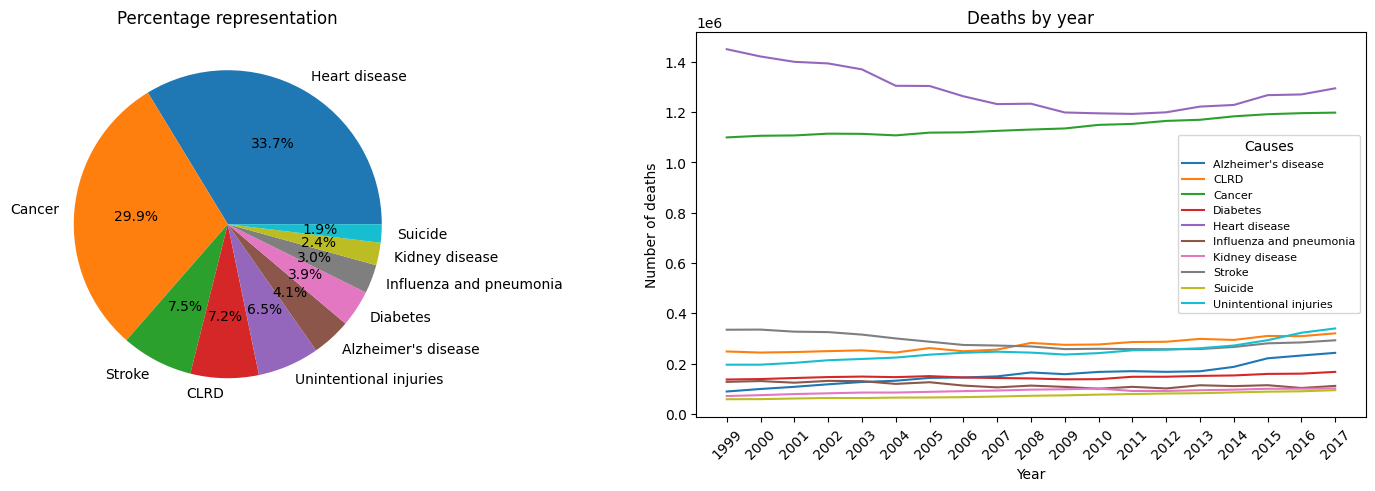

In [16]:
out = file[file["Cause Name"] != "All causes"]
cause = out.groupby(["Year", "Cause Name"])["Deaths"].sum()
deaths = cause.groupby("Cause Name").sum()
deaths = deaths.sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

cause_values = deaths.tolist()
cause_labels = deaths.index.tolist()
ax1.pie(cause_values, labels=cause_labels, autopct='%1.1f%%')
ax1.set_title("Percentage representation")

cause.unstack().plot(kind="line", ax=ax2)
ax2.set_title("Deaths by year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of deaths")
ax2.legend(title="Causes", fontsize=8)
ax2.set_xticks(range(min(out["Year"]), max(out["Year"])+1))
plt.xticks(rotation=45)

plt.show()

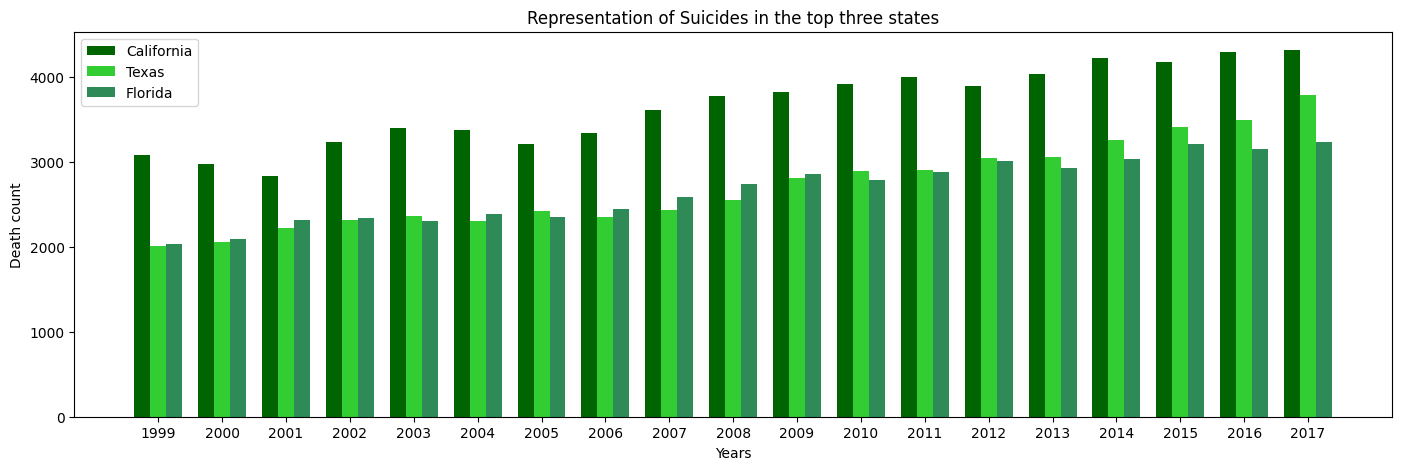

In [18]:
second = file[file["State"].isin(["California", "Texas", "Florida"]) & (file["Cause Name"] == "Suicide")]
year = second.groupby(["Year", "State"])["Deaths"].sum()
year2 = year.unstack()
fig, ax = plt.subplots(figsize=(17, 5))

w = 0.25

rr = year2.index

ax.bar(rr - w, year2["California"], width=w, label="California", color='darkgreen')
ax.bar(rr, year2["Texas"], width=w, label="Texas",color='limegreen')
ax.bar(rr + w, year2["Florida"], width=w, label="Florida",color='seagreen')

ax.set_xlabel("Years")
ax.set_xticks(rr)
ax.set_xticklabels(year2.index)
ax.set_ylabel("Death count")
ax.set_title("Representation of Suicides in the top three states")
ax.legend()

plt.show()

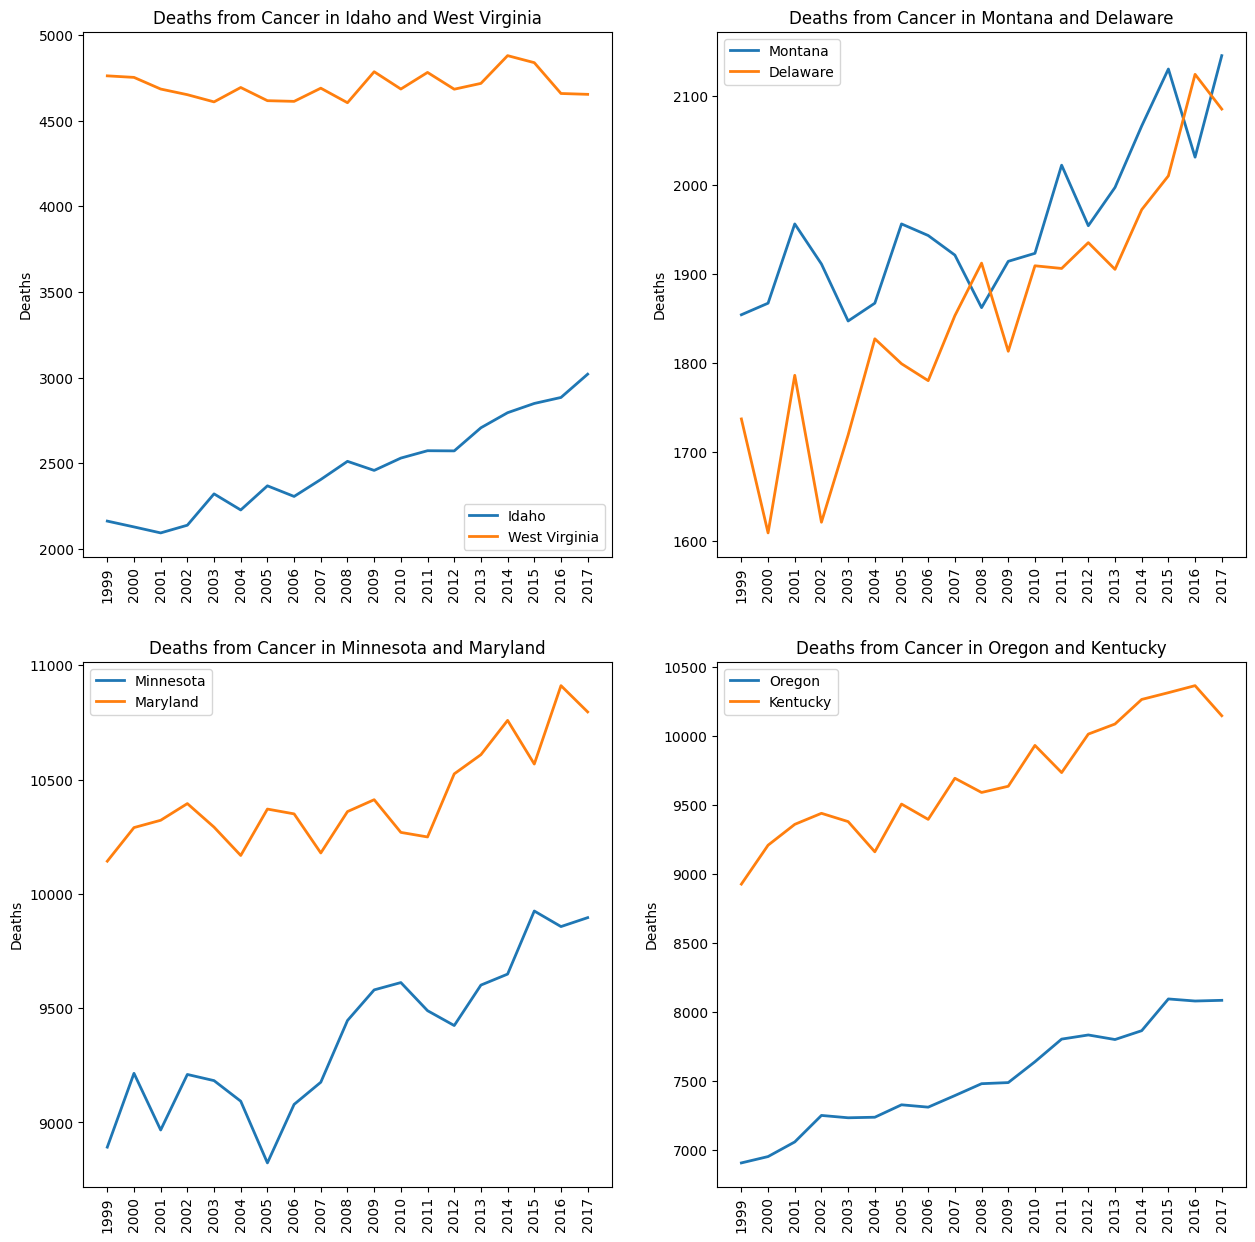

In [48]:
def plot_data(ax, data, state1, state2):
    index = range(len(data))
    ax.plot(index, data[state1], label=state1, linewidth=2)
    ax.plot(index, data[state2], label=state2, linewidth=2)
    ax.set_xticks(index)
    ax.set_xticklabels(data.index)
    ax.set_ylabel("Deaths")
    ax.set_title(f"Deaths from Cancer in {state1} and {state2}")
    ax.legend()

states = [("Idaho", "West Virginia"),
          ("Montana", "Delaware"),
          ("Minnesota", "Maryland"),
          ("Oregon", "Kentucky")]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

third = file[file["Cause Name"] == "Cancer"]
third1 = third.groupby(["Year", "State"])["Deaths"].sum()
third2 = third1.unstack()

for i, (state1, state2) in enumerate(states):
    plot_data(axs[i], third2, state1, state2)
    axs[i].set_xticklabels(third2.index, rotation=90)
plt.show()